# Model simulation and sanity check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="darkgrid")


In [2]:
from agent import run_experiment, Bandit, Agent
bandit = Bandit()

# Rescorla Wagner

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 5, 'noise': 0, 'bias': 0, 'Pav': 0}


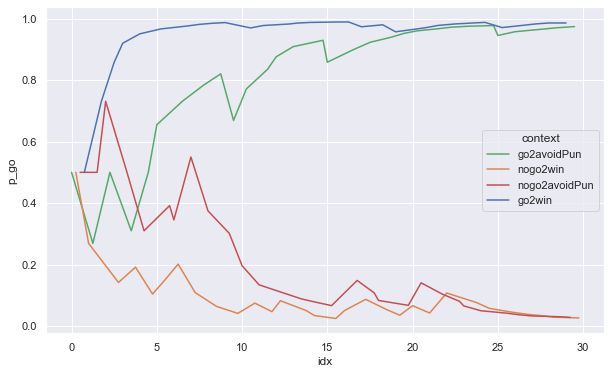

In [3]:
df = run_experiment(bandit, n_runs=30, params={'alpha': 0.2, 'beta': 5, 'noise': 0, 'bias': 0, 'Pav': 0})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)

In [9]:
from fitting import ML

max_likelihood = ML(df, optimization_method='Nelder-Mead', model_type='RW', initial_guess=[0.1,0.1], without_bound=True)

res = max_likelihood.fit_model()
res

 final_simplex: (array([[-1.43582326,  1.38731076],
       [-1.43585461,  1.38731166],
       [-1.43577201,  1.38726062]]), array([45.2091444 , 45.2091444 , 45.20914442]))
           fun: 45.20914439883366
       message: 'Optimization terminated successfully.'
          nfev: 77
           nit: 39
        status: 0
       success: True
             x: array([-1.43582326,  1.38731076])

In [13]:
1/(np.exp(-res.x[0]) + 1)

0.1921929746234021

# Rescorla Wegner + Noise

Running a go-nogo experiment simulation with params = {'alpha': 0.3, 'beta': 3, 'noise': 0.3, 'bias': 0, 'Pav': 0}


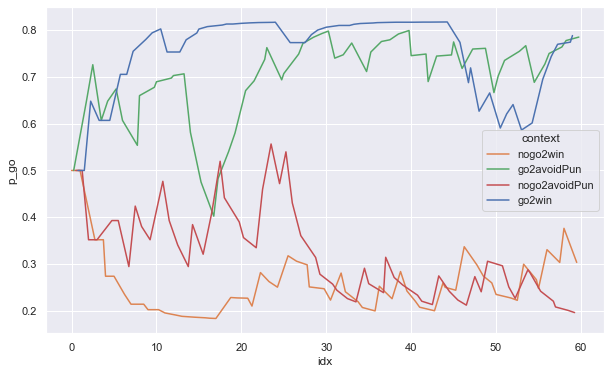

In [80]:
df = run_experiment(bandit, n_runs=60, params={'alpha': 0.3, 'beta': 3, 'noise': 0.3, 'bias': 0, 'Pav': 0})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)


In [81]:
from fitting import ML

max_likelihood = ML(df, optimization_method='Nelder-Mead', model_type='RW+noise', initial_guess=np.array([0.1,0.1,0.1]), without_bound=True)

res = max_likelihood.fit_model()


In [82]:
res

 final_simplex: (array([[-0.44457272,  1.03700508, -0.92756213],
       [-0.44458875,  1.03699194, -0.92761426],
       [-0.44460086,  1.03701617, -0.92753547],
       [-0.44456991,  1.03694483, -0.92766053]]), array([138.1873186 , 138.1873186 , 138.1873186 , 138.18731861]))
           fun: 138.18731860189862
       message: 'Optimization terminated successfully.'
          nfev: 266
           nit: 140
        status: 0
       success: True
             x: array([-0.44457272,  1.03700508, -0.92756213])

In [83]:
1/(np.exp(-res.x[0]) + 1)

0.3906519225153014

In [84]:
np.exp(res.x[1])

2.8207564194728865

In [85]:
1/(np.exp(-res.x[2]) + 1)

0.2834195679441431

# Rescorla Wegner + Noise + Go Bias

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 2, 'noise': 0.2, 'bias': 1, 'Pav': 0}


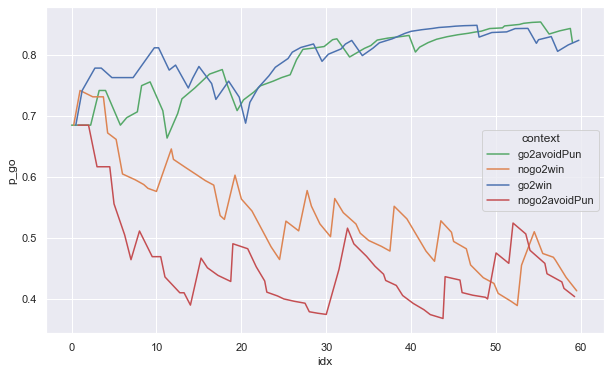

In [91]:
df = run_experiment(bandit, n_runs=60, params={'alpha': 0.2, 'beta': 2, 'noise': 0.2, 'bias': 1, 'Pav': 0})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)

In [92]:
from fitting import ML

max_likelihood = ML(df, optimization_method='L-BFGS-B', model_type='RW+noise+bias',initial_guess=np.array([0.1,0.1,0.1,0.1]), without_bound=True)

res = max_likelihood.fit_model()


In [93]:
res

      fun: 148.92774694523757
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.84217096e-05,  3.55271370e-04,  0.00000000e+00, -2.84217071e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 185
      nit: 31
     njev: 37
   status: 0
  success: True
        x: array([-1.06708714,  2.8648347 ,  0.33427929, 10.91252339])

In [94]:
1/(np.exp(-res.x[0]) + 1)

0.2559574239147003

In [95]:
np.exp(res.x[1])

17.54615265581867

In [97]:
1/(np.exp(-res.x[2]) + 1)

0.5828002273238629

# Rescorla Wegner + Noise + Go Bias + Pavlovian Bias

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 5, 'noise': 0.2, 'bias': 0.5, 'Pav': 1.1}


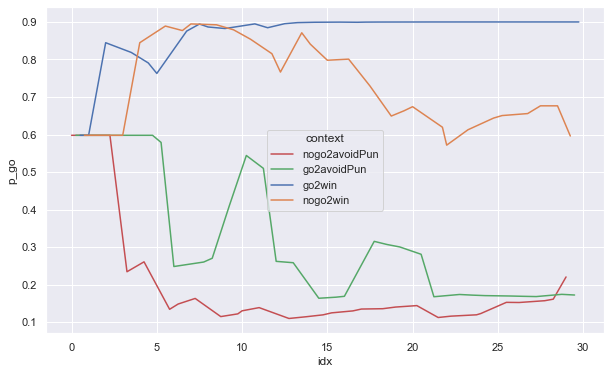

In [117]:
df = run_experiment(bandit, n_runs=30, params={'alpha': 0.2, 'beta': 5, 'noise': 0.2, 'bias': 0.5, 'Pav': 1.1})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)

In [118]:
from fitting import ML

max_likelihood = ML(df, optimization_method='Nelder-Mead', model_type='RW+noise+bias+Pav',initial_guess=np.array([0.1,0.1,0.1,0.1, 0.1]), without_bound=True)

res = max_likelihood.fit_model()

In [119]:
res

 final_simplex: (array([[-1.56135578,  4.36865672, -0.92452749,  0.99999992, -0.70790418],
       [-1.56137902,  4.36858219, -0.92450466,  0.99999977, -0.70791143],
       [-1.56136441,  4.36857384, -0.92462254,  0.99999988, -0.70792274],
       [-1.5613608 ,  4.36858819, -0.92458358,  0.99999966, -0.70789893],
       [-1.56136092,  4.36868082, -0.92462059,  0.99999993, -0.70789695],
       [-1.56138248,  4.36871443, -0.92456921,  0.99999948, -0.70790051]]), array([54.52049598, 54.52049602, 54.52049603, 54.52049606, 54.52049606,
       54.52049608]))
           fun: 54.52049597735991
       message: 'Optimization terminated successfully.'
          nfev: 954
           nit: 607
        status: 0
       success: True
             x: array([-1.56135578,  4.36865672, -0.92452749,  0.99999992, -0.70790418])

In [120]:
1/(np.exp(-res.x[0]) + 1)

0.1734521875153889

In [121]:
np.exp(res.x[4])

0.49267567531065953